In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

from matplotlib.patches import FancyArrowPatch
from mpl_toolkits.mplot3d import proj3d

class Arrow3D(FancyArrowPatch):
    def __init__(self, xs, ys, zs, *args, **kwargs):
        FancyArrowPatch.__init__(self, (0,0), (0,0), *args, **kwargs)
        self._verts3d = xs, ys, zs

    def draw(self, renderer):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)
        self.set_positions((xs[0],ys[0]),(xs[1],ys[1]))
        FancyArrowPatch.draw(self, renderer)


In [3]:
def get_parallelepiped(xc, yc, zc, dx=1, dy=1, dz=1, **kwargs):

    zt = zc + dz / 2
    zb = zc - dz / 2
    
    yl = yc - dy / 2
    yr = yc + dy / 2
    
    xb = xc + dx / 2
    xf = xc - dx / 2
    
    face_front = [
        (xf, yl, zb), (xf, yr, zb), (xf, yr, zt), (xf, yl, zt), 
    ]
    
    face_back = [
        (xb,) + p[1:] for p in face_front
    ]

    
    face_right = [ 
        (xf, yr, zb), (xb, yr, zb), (xb, yr, zt), (xf, yr, zt),
    ]
    
    face_left = [
        (p[0], yl, p[2]) for p in face_right
    ]
    
    face_top = [
        (xf, yr, zt), (xb, yr, zt), (xb, yl, zt), (xf, yl, zt)
    ]
    
    face_bot = [p[:2] + (zb,) for p in face_top]
    
    
    faces = [face_left, face_right, face_front, face_back, face_bot, face_top]
    
    
    return Poly3DCollection(faces, **kwargs)
    
    



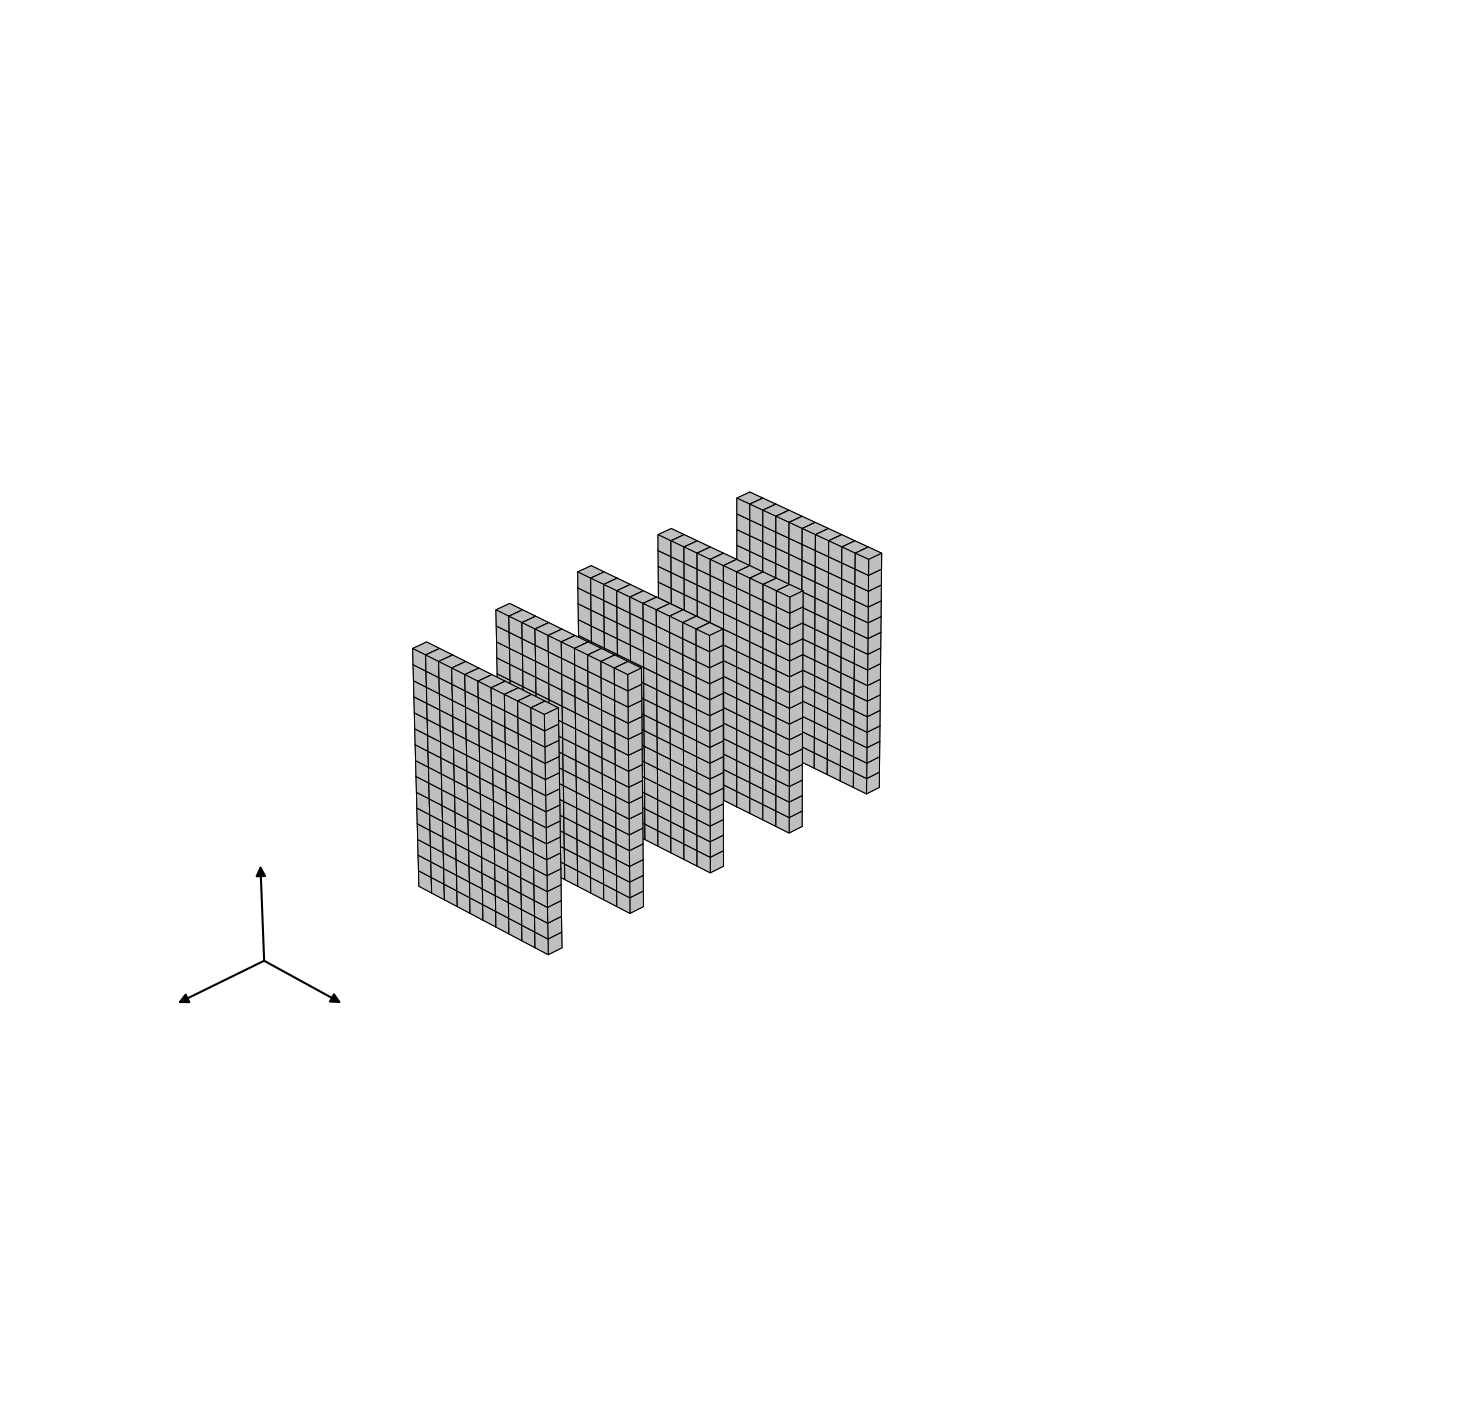

In [4]:
fig = plt.figure(figsize=(6, 6), dpi=300)
ax = fig.add_subplot(111, projection='3d')

linewidth = 0.5
ax.view_init(elev=30, azim=45)
ax.set_axis_off()

"""
# Example
col = get_parallelepiped(0, 0, 0, dx=0.2, dy=2, dz=1, 
                                       linewidths=linewidth, alpha=0.5, 
                                       edgecolor="k")
col.set_facecolor("0.75")
ax.add_collection3d(col)
"""


linewidth = 0.5


start_x = -5
start_y = -5
start_z = -5

nslabs = 5
ncols = 10 # width of a slab
nrows = 15 # height of a slab

dist = 3 # distance between slabs

dx = 0.5
dy = 0.5
dz = 0.5


gridcell_props = dict(
    linewidths=linewidth / 2, 
    alpha=1, 
    edgecolor="k",
    dx=dx, dy=dy, dz=dz,
    facecolor="0.75"
)

gridcells = []
for sl in range(nslabs):
    xc = start_x + sl * dist
    
    for row in range(nrows):
        zc = start_z + row * dz
        for col in range(ncols):
            yc = start_y + dy * col
            c = get_parallelepiped(xc, yc, zc, **gridcell_props)
            gridcells.append(c)
        

for c in gridcells:
    ax.add_collection3d(c)
    
    
# Draw arrows
arrow_start_x = start_x + nslabs * dist + 3
arrow_start_y = -5
arrow_start_z = -5


arrow_prop_dict = dict(mutation_scale=5, arrowstyle='-|>', color='k', shrinkA=0, shrinkB=0, linewidth=0.5)
arrow_length = 3
origin = np.array([arrow_start_x, arrow_start_y, arrow_start_z])

#k
arrow_end = origin.copy()
arrow_end[-1] += arrow_length
ax.add_artist(Arrow3D(*zip(origin, arrow_end), **arrow_prop_dict))

#j
arrow_end = origin.copy()
arrow_end[1] += arrow_length
ax.add_artist(Arrow3D(*zip(origin, arrow_end), **arrow_prop_dict))
#ax.text2D(0.2, 0.4, r"$k$", transform=ax.transAxes)

#i
arrow_end = origin.copy()
arrow_end[0] += arrow_length
ax.add_artist(Arrow3D(*zip(origin, arrow_end), **arrow_prop_dict))
#ax.text2D(0.2, 0.4, r"$k$", transform=ax.transAxes)




# Tweaking display region and labels
mxdist = 10
ax.set_xlim(-mxdist, mxdist)
ax.set_ylim(-mxdist, mxdist)
ax.set_zlim(-mxdist, mxdist)
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')


fig.savefig("slabs.png", bbox_inches="tight", dpi=200, transparent=True)



83.33333333333333

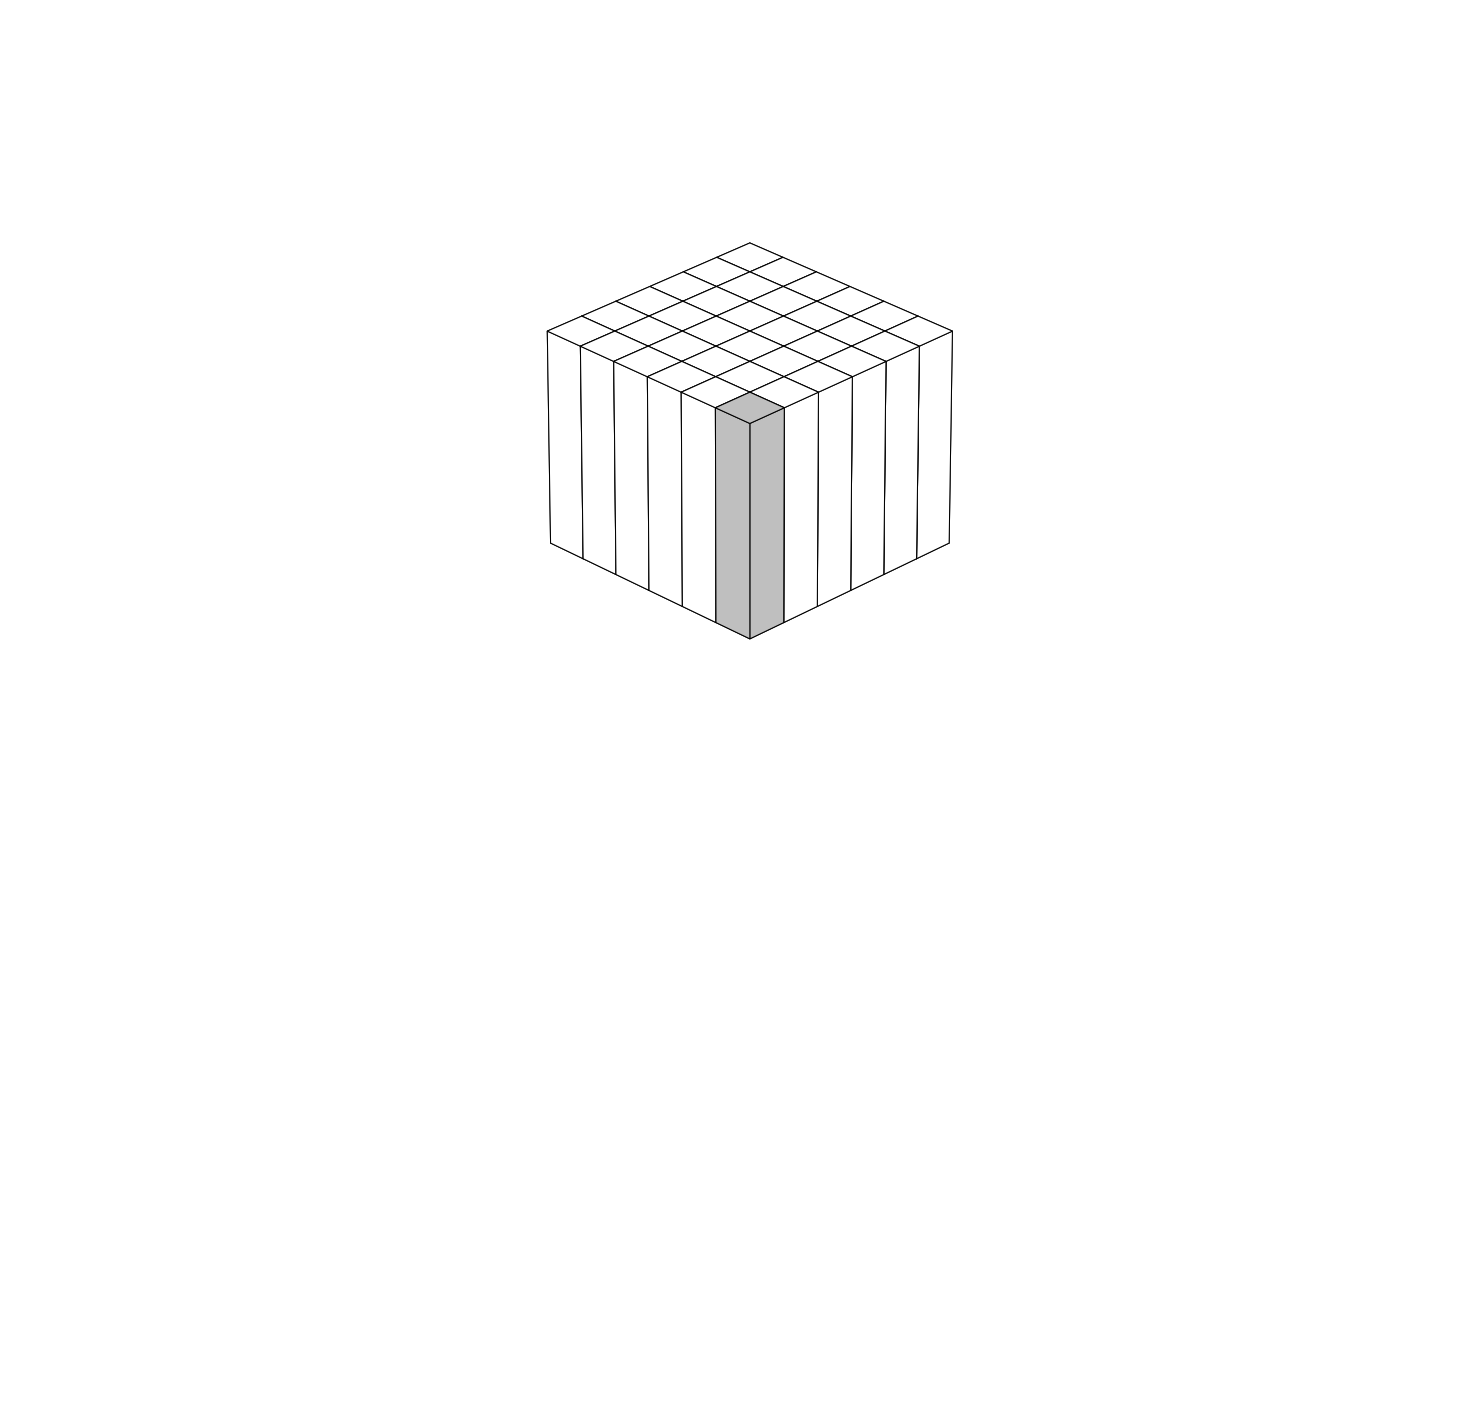

In [14]:
# plot tiles

fig = plt.figure(figsize=(6, 6), dpi=300)
ax = fig.add_subplot(111, projection='3d')

linewidth = 0.5
ax.view_init(elev=30, azim=45)
ax.set_axis_off()

"""
# Example
col = get_parallelepiped(0, 0, 0, dx=0.2, dy=2, dz=1, 
                                       linewidths=linewidth, alpha=0.5, 
                                       edgecolor="k")
col.set_facecolor("0.75")
ax.add_collection3d(col)
"""


linewidth = 0.5


dx = 0.5
dy = 0.5
dz = 2
start_x = -2
start_y = -2

nrows = 6
ncols = 6

gridcell_props = dict(
    linewidths=linewidth / 2, 
    alpha=1, 
    edgecolor="k",
    dx=dx, dy=dy, dz=dz,
    facecolor="0.75"
)

gridcells = []

for row in range(nrows):
    xc = start_x + row * dx
    for col in range(ncols):
        yc = start_y + dy * col
        props = gridcell_props.copy()
        props["facecolor"] = "w"
        
        if row == nrows - 1 and col == ncols - 1:
            props["facecolor"] = "0.75"
            
        c = get_parallelepiped(xc, yc, zc, **props)
        gridcells.append(c)
        
for c in gridcells:
    ax.add_collection3d(c)

    
# Tweaking display region and labels
mxdist = 4
ax.set_xlim(-mxdist, mxdist)
ax.set_ylim(-mxdist, mxdist)
ax.set_zlim(-mxdist/1.3, mxdist/1.3)
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')

        
fig.savefig("tiles.png", bbox_inches="tight", dpi=200, transparent=True)